In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

### Dataset Olivetti Faces: https://scikit-learn.org/0.19/datasets/olivetti_faces.html

Imágenes en escala de grises (0-255 por píxel)

400 imágenes

64x64 píxeles = 4096 características

In [2]:
faces = fetch_olivetti_faces()
data = faces.data
n_img, n_caract = data.shape # 400 imágenes, 4096 características
h, w = faces.images.shape[1], faces.images.shape[2] # 64 x 64


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


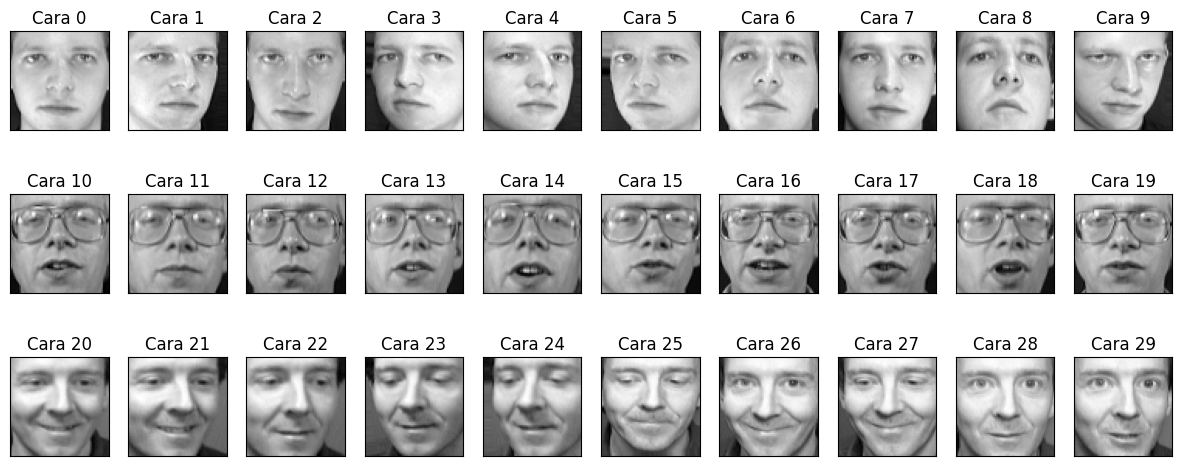

In [3]:
fig, axes = plt.subplots(3,10, figsize=(15,6), subplot_kw={ 'xticks': [], 'yticks': [] })
for i, ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(h,w), cmap='gray')
    ax.set_title(f"Cara {i}")


In [4]:
pca = PCA()
pca.fit(data)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)


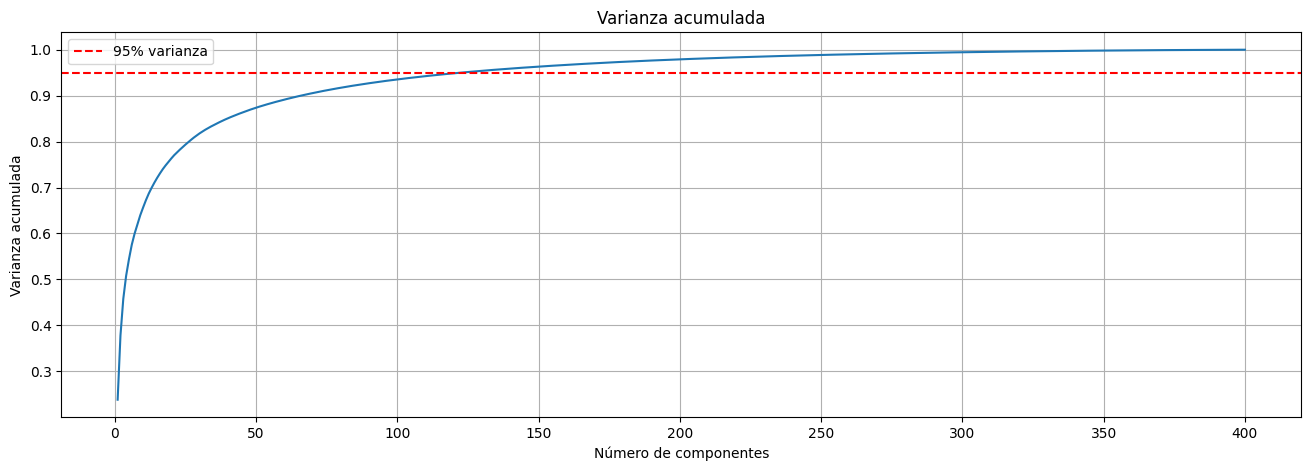

In [5]:
plt.figure(figsize=(16,5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, linestyle='-')
plt.title('Varianza acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% varianza')
plt.legend()
plt.show()

¿Cuántos componentes necesitamos para llegar al 95% de la varianza acumulada?

In [6]:
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1 # argmax -> Primer índice igual o mayor a 0.95
print(f"Necesitamos {n_components_95} componentes para representar el 95% de la varianza")
print(f"Compresión de datos conseguida del {1 - (n_components_95/n_caract):.2%}")

Necesitamos 123 componentes para representar el 95% de la varianza
Compresión de datos conseguida del 97.00%


### Visualizar los Eigenfaces

Patrones fundamentales que PCA extrae de las imágenes. Capturan variaciones globales como dirección de la iluminación por ejemplo, o fomra de nariz, presencia de gafas o expresión facial.

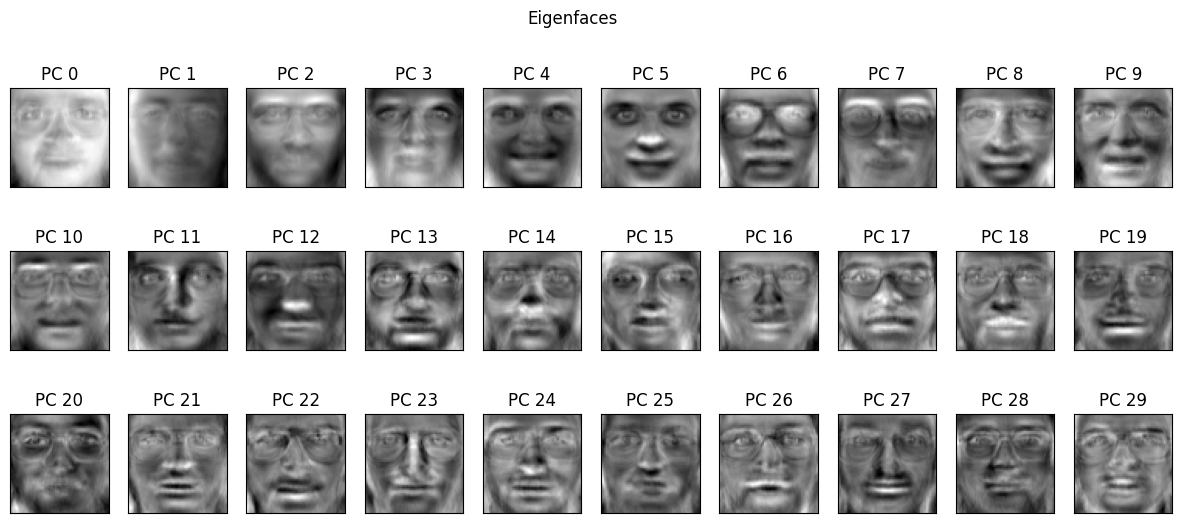

In [7]:
fig, axes = plt.subplots(3,10, figsize=(15,6), subplot_kw={ 'xticks': [], 'yticks': [] })
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(h,w), cmap='gray')
    ax.set_title(f"PC {i}")
plt.suptitle("Eigenfaces")
plt.show()

### Reconstrucción de caras originales con n PCA

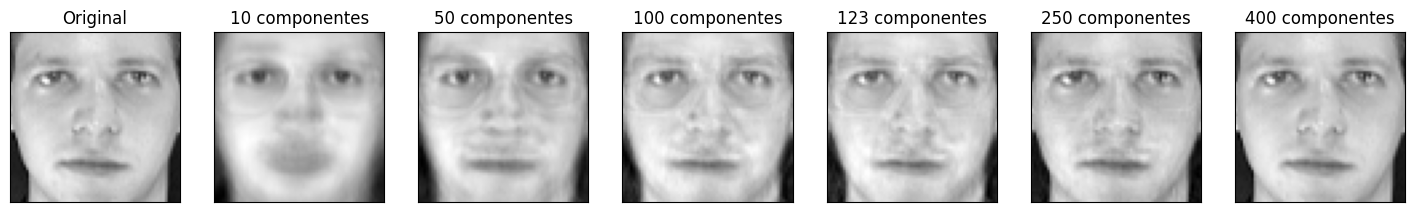

In [8]:
imagen = data[0]

n_components_list = [10, 50, 100, 123, 250, 400]
face_transformed = pca.transform([imagen]) #

fig, axes = plt.subplots(1, len(n_components_list) + 1, figsize=(18, 4), subplot_kw={ 'xticks': [], 'yticks': [] })

axes[0].imshow(imagen.reshape(h,w), cmap='gray')
axes[0].set_title("Original")

for i, n_components in enumerate(n_components_list):
    temp = face_transformed.copy()
    temp[:, n_components:] = 0
    reconstructed_image = pca.inverse_transform(temp)

    axes[i+1].imshow(reconstructed_image.reshape(h,w), cmap='gray')
    axes[i+1].set_title(f"{n_components} componentes")

plt.show()






Vamos a clasificar las imágenes usando k-means sin PCA y con PCA


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score, confusion_matrix, ConfusionMatrixDisplay

kmeans = KMeans(n_clusters=40, random_state=42)
kmeans.fit(data)

ari = adjusted_rand_score(faces.target, kmeans.labels_)
print(f"\nAdjusted Rand Index (ARI): {ari:.4f}")


Adjusted Rand Index (ARI): 0.4301


In [21]:
pca_data = pca.transform(data)

kmeans_pca = KMeans(n_clusters=40, random_state=42)
kmeans_pca.fit(pca_data)

ari = adjusted_rand_score(faces.target, kmeans_pca.labels_)
print(f"\nAdjusted Rand Index (ARI): {ari:.4f}")


Adjusted Rand Index (ARI): 0.4301


Generando Matriz de Confusión...


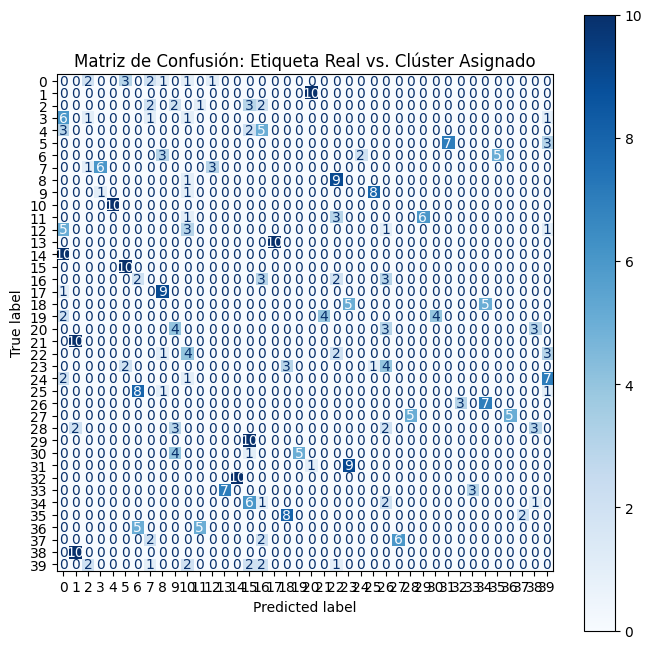

In [25]:
print("Generando Matriz de Confusión...")
cm = confusion_matrix(faces.target, kmeans.labels_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(40))
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues')
plt.title("Matriz de Confusión: Etiqueta Real vs. Clúster Asignado")
plt.show()

Generando Matriz de Confusión...


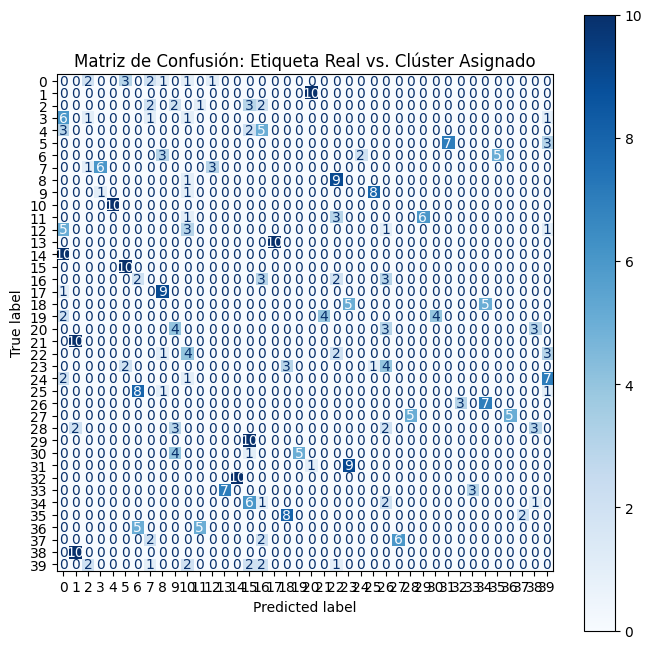

In [24]:

print("Generando Matriz de Confusión...")
cm = confusion_matrix(faces.target, kmeans_pca.labels_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(40))
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues')
plt.title("Matriz de Confusión: Etiqueta Real vs. Clúster Asignado")
plt.show()